In [151]:
import pandas as pd
import calendar
import seaborn as sns


data3 = pd.read_csv('june30.txt')
data2 = pd.read_csv('june23.txt')
data4 = pd.read_csv('june16.txt')
data = pd.concat([data3,data2,data4],ignore_index = True)

print(data.shape)
print(data2.shape)
print(data3.shape)
data3.head()

(590354, 11)
(196686, 11)
(196690, 11)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,00:00:00,REGULAR,6667150,2259901
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,04:00:00,REGULAR,6667173,2259909
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,08:00:00,REGULAR,6667189,2259938
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,12:00:00,REGULAR,6667305,2260006
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,16:00:00,REGULAR,6667534,2260066


In [153]:
#data['DATE/TIME'] = pd.to_datetime(data['DATE'] + ' ' + data['TIME'])
data['day'] = pd.to_datetime(data['DATE'])

In [154]:
by_day = data[(data['TIME']== '00:00:00') & (data['DESC'] == 'REGULAR')]

In [155]:
by_day.sort_values(['C/A','UNIT','SCP','day'])
by_day.groupby('DESC').count()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,day
DESC,,,,,,,,,,,
REGULAR,50856,50856,50856,50856,50856,50856,50856,50856,50856,50856,50856


In [156]:
by_day['COUNT'] = by_day.sort_values(['C/A','UNIT','SCP','day']).groupby(['C/A','UNIT','SCP'])['ENTRIES'].diff()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [180]:
by_day['day2'] = by_day['day'] - pd.Timedelta(1,'D')
by_day.head()

Counts_by_turnstile = by_day[['DIVISION','C/A','UNIT','SCP','STATION','day2','COUNT']]
Counts_by_turnstile.dropna(axis=0, inplace=True)
Counts_by_turnstile = Counts_by_turnstile.sort_values(['DIVISION','C/A','UNIT','SCP','day2'])

def data_cleanse(row):
    counter = row['COUNT']
    if counter < 0:
        counter = -counter
    if counter > 90000:
        counter = 0
    return counter

Counts_by_turnstile['Fixed Counts'] = Counts_by_turnstile.apply(data_cleanse, axis=1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [181]:
(
Counts_by_turnstile[(Counts_by_turnstile['STATION'] == '34 ST-HERALD SQ')
                    & (Counts_by_turnstile['Fixed Counts']>5000)]
)

,DIVISION,C/A,UNIT,SCP,STATION,day2,COUNT,Fixed Counts
396370,BMT,A022,R022,01-00-00,34 ST-HERALD SQ,2018-06-11,5594.0,5594.0
396376,BMT,A022,R022,01-00-00,34 ST-HERALD SQ,2018-06-12,5551.0,5551.0
396382,BMT,A022,R022,01-00-00,34 ST-HERALD SQ,2018-06-13,5501.0,5501.0
396388,BMT,A022,R022,01-00-00,34 ST-HERALD SQ,2018-06-14,5819.0,5819.0
199629,BMT,A022,R022,01-00-00,34 ST-HERALD SQ,2018-06-15,5616.0,5616.0
199647,BMT,A022,R022,01-00-00,34 ST-HERALD SQ,2018-06-18,5502.0,5502.0
199653,BMT,A022,R022,01-00-00,34 ST-HERALD SQ,2018-06-19,5830.0,5830.0
199659,BMT,A022,R022,01-00-00,34 ST-HERALD SQ,2018-06-20,5704.0,5704.0
199665,BMT,A022,R022,01-00-00,34 ST-HERALD SQ,2018-06-21,5849.0,5849.0
2928,BMT,A022,R022,01-00-00,34 ST-HERALD SQ,2018-06-22,5556.0,5556.0


In [159]:
%matplotlib inline

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

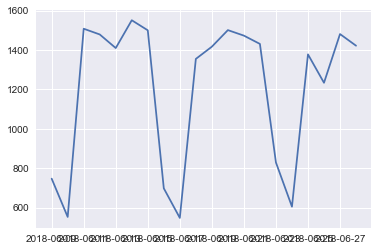

In [161]:
(
plt.plot(Counts_by_turnstile[(Counts_by_turnstile['SCP']=='02-00-00')
        & (Counts_by_turnstile['STATION']=='59 ST')]['day2']
        ,Counts_by_turnstile[(Counts_by_turnstile['SCP']=='02-00-00')
        & (Counts_by_turnstile['STATION']=='59 ST')]['Fixed Counts'])
)    

In [188]:
count_by_station = Counts_by_turnstile.groupby(['STATION','DIVISION','day2'])['Fixed Counts'].sum().reset_index()

count_by_station['Name_of_Day'] = count_by_station['day2'].dt.weekday_name
count_by_station['Week Number'] = count_by_station['day2'].dt.week

In [189]:
def fixed_week(row):
    week = row['Week Number']
    if row['Name_of_Day'] == 'Saturday':
        week += 1
    elif row['Name_of_Day'] == 'Sunday':
        week += 1
    return week

count_by_station['Week Number'] = count_by_station.apply(fixed_week, axis=1)

In [192]:
mask = (count_by_station['STATION'] == '86 ST') & (count_by_station['DIVISION'] == 'BMT')
print(count_by_station[mask])

     STATION DIVISION       day2  Fixed Counts Name_of_Day  Week Number
1730   86 ST      BMT 2018-06-09        6849.0    Saturday           24
1731   86 ST      BMT 2018-06-10        5013.0      Sunday           24
1732   86 ST      BMT 2018-06-11       11694.0      Monday           24
1733   86 ST      BMT 2018-06-12       11644.0     Tuesday           24
1734   86 ST      BMT 2018-06-13       11623.0   Wednesday           24
1735   86 ST      BMT 2018-06-14       11634.0    Thursday           24
1736   86 ST      BMT 2018-06-15       10673.0      Friday           24
1737   86 ST      BMT 2018-06-16        7128.0    Saturday           25
1738   86 ST      BMT 2018-06-17        5175.0      Sunday           25
1739   86 ST      BMT 2018-06-18       11082.0      Monday           25
1740   86 ST      BMT 2018-06-19       11910.0     Tuesday           25
1741   86 ST      BMT 2018-06-20       11711.0   Wednesday           25
1742   86 ST      BMT 2018-06-21       11411.0    Thursday      

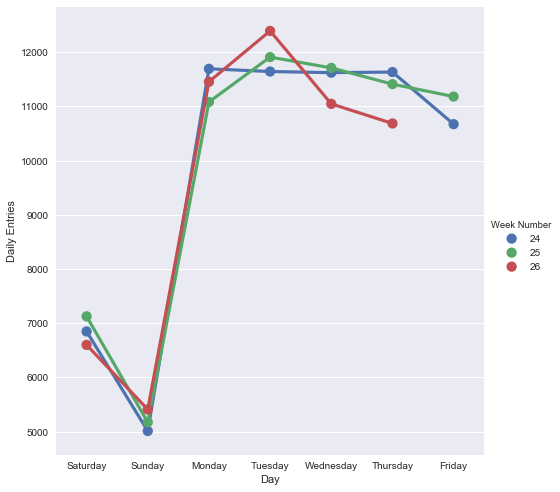

In [193]:
sns.set()
fig = sns.factorplot(x='Name_of_Day',y='Fixed Counts',hue ='Week Number', size=7, data = count_by_station[mask])
fig.set_axis_labels('Day','Daily Entries')

# Total By Station

In [194]:
totals_by_station = count_by_station.groupby(['STATION','DIVISION'])['Fixed Counts'].sum().reset_index()

In [197]:
totals_by_station = totals_by_station.sort_values('Fixed Counts', ascending = False)

In [198]:
totals_by_station

,STATION,DIVISION,Fixed Counts
227,TIMES SQ-42 ST,IRT,1604197.0
51,34 ST-PENN STA,IND,1422052.0
49,34 ST-HERALD SQ,IND,1379584.0
166,GRD CNTRL-42 ST,IRT,1349603.0
58,42 ST-PORT AUTH,IND,1175197.0
74,59 ST COLUMBUS,IND,1010398.0
155,FLUSHING-MAIN,IRT,1004030.0
61,47-50 STS ROCK,IND,970347.0
179,JKSN HT-ROOSVLT,IND,898908.0
40,23 ST,IND,885736.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f232128>]],
      dtype=object)

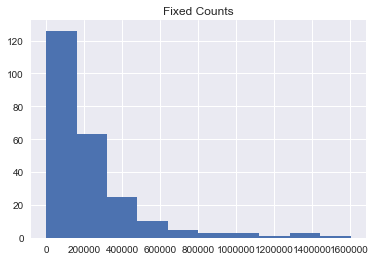

In [200]:
totals_by_station.hist()

In [199]:
print(totals_by_station)

             STATION DIVISION  Fixed Counts
227   TIMES SQ-42 ST      IRT     1604197.0
51    34 ST-PENN STA      IND     1422052.0
49   34 ST-HERALD SQ      IND     1379584.0
166  GRD CNTRL-42 ST      IRT     1349603.0
58   42 ST-PORT AUTH      IND     1175197.0
74    59 ST COLUMBUS      IND     1010398.0
155    FLUSHING-MAIN      IRT     1004030.0
61    47-50 STS ROCK      IND      970347.0
179  JKSN HT-ROOSVLT      IND      898908.0
40             23 ST      IND      885736.0
48   34 ST-HERALD SQ      BMT      874108.0
89             86 ST      IRT      773080.0
73             59 ST      IRT      745188.0
57   42 ST-BRYANT PK      IND      737470.0
185  LEXINGTON AV/53      IND      675841.0
71        57 ST-7 AV      BMT      649003.0
148        DEKALB AV      BMT      621530.0
177  JAY ST-METROTEC      IND      619030.0
175   JAMAICA CENTER      IND      616272.0
52    34 ST-PENN STA      IRT      568732.0
96    ATL AV-BARCLAY      IRT      565795.0
110       BEDFORD AV      BMT   